# Kaggle Project_유강

# Dataset Describtion

URL: https://www.kaggle.com/

This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy while still providing valuable insights into the workforce.

Task: 

    1. What is the distribution of educational qualifications among employees?
    2. How does the length of service (Joining Year) vary across different cities?
    3. Is there a correlation between Payment Tier and Experience in Current Domain?
    4. What is the gender distribution within the workforce?
    5. Are there any patterns in leave-taking behavior among employees?

Datasets

In [ ]:
1. Education: The educational qualifications of employees, including degree, institution, and field of study.

2. Joining Year: The year each employee joined the company, indicating their length of service.

3. City: The location or city where each employee is based or works.

4. Payment Tier: Categorization of employees into different salary tiers.

5. Age: The age of each employee, providing demographic insights.

6. Gender: Gender identity of employees, promoting diversity analysis.

7. Ever Benched: Indicates if an employee has ever been temporarily without assigned work.

8. Experience in Current Domain: The number of years of experience employees have in their current field.

9. Leave or Not: a target column

    
    
Train dataset: 1-9 80% of all data
    
Validation dataset: The rest 20% of 1-8
    
Test dataset: The rest 20% of 9

Usage:
    This dataset can be used for various HR and workforce-related analyses, including employee retention, salary structure assessments, diversity and inclusion studies, and leave pattern analyses. Researchers, data analysts, and HR professionals can gain valuable insights from this dataset.

Features(x): The datasets of 1-8

Target(y): The datasets of 9

# Model Buliding

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
employee_data = pd.read_csv("C:/Users/USER/MachineLearning/Employee.csv")

# 1. Data Preprocessing

# 1.1 Basic Data Analysis

In [4]:
employee_data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
employee_data.shape

(4653, 9)

In [6]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
employee_data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [8]:
employee_data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# 1.2 Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [10]:
categorical_columns = ['Gender', 'EverBenched', 'Education', 'City']
#Apply label encoding to each categorical column
for column in categorical_columns:
    employee_data[column] = label_encoder.fit_transform(employee_data[column])

# 1.3 Define Features and the Target Variable

In [11]:
X = employee_data.drop('LeaveOrNot',axis = 1)
y = employee_data['LeaveOrNot']

# 1.4 Data visualization

Text(0, 0.5, 'Count')

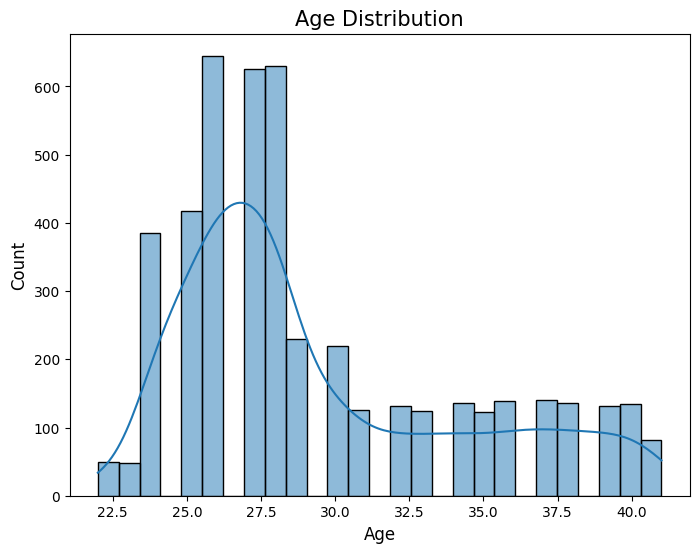

In [12]:
plt.figure(figsize=(8,6))

sns.histplot(employee_data['Age'],kde = True)

plt.title("Age Distribution", fontsize = 15)
plt.xlabel("Age",fontsize = 12)
plt.ylabel("Count", fontsize = 12)

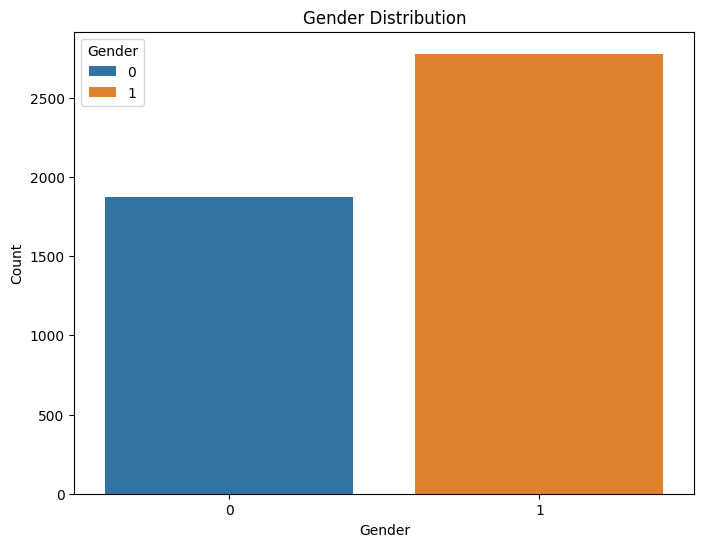

In [13]:
plt.figure(figsize=(8,6))

sns.countplot(data=employee_data, x='Gender', hue = 'Gender')

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

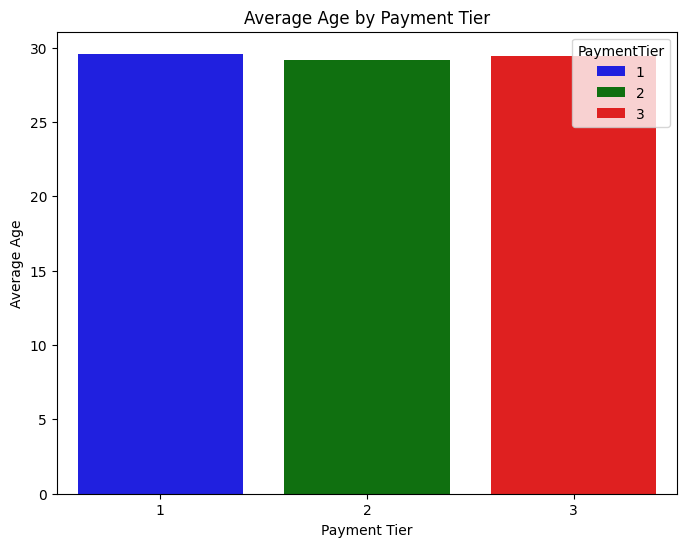

In [14]:
plt.figure(figsize=(8,6))

palette = {1: 'blue', 2: 'green', 3: 'red'}
sns.barplot(data=employee_data, x='PaymentTier', y='Age', hue='PaymentTier', palette=palette, errorbar=None)

plt.title("Average Age by Payment Tier")
plt.xlabel("Payment Tier")
plt.ylabel("Average Age")

plt.show()

# 1.5 Data spliting

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 2. Model Construction

# 2.1 Set Models

In [17]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(fit_intercept = True, solver='liblinear',random_state=0)

In [18]:
from sklearn.tree import DecisionTreeClassifier

#Construct the decision tree model
model_dt = DecisionTreeClassifier(criterion='gini',splitter='best',
                                             max_depth = 10, random_state = 0)

In [19]:
models = [model_lr, model_dt]

# 2.2 Model Training

In [20]:
from sklearn.metrics import accuracy_score
for model in models:
    model.fit(X_train, y_train)
    pre = model.predict(X_train)
    
    acc = accuracy_score(pre, y_train)
    
    print(model, acc)

LogisticRegression(random_state=0, solver='liblinear') 0.7122514777001612
DecisionTreeClassifier(max_depth=10, random_state=0) 0.8855454056958625


In [21]:
#Choose the model
model = model_dt

# 3. Performance

In [22]:
from sklearn.metrics import accuracy_score
pre = model.predict(X_test)
acc = accuracy_score(y_test, pre)
print("Test Accuracy:", acc)

Test Accuracy: 0.8603651987110634


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       610
           1       0.87      0.70      0.78       321

    accuracy                           0.86       931
   macro avg       0.86      0.82      0.84       931
weighted avg       0.86      0.86      0.86       931



In [24]:
from sklearn.metrics import confusion_matrix

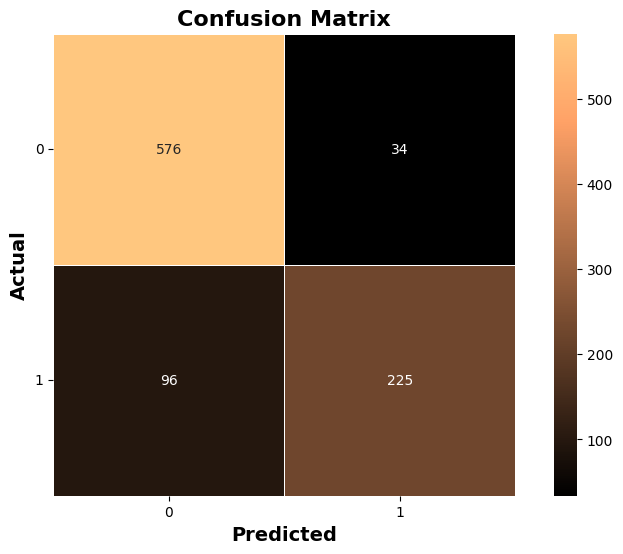

In [25]:
cm = confusion_matrix(y_test, pre)

plt.figure(figsize = (10, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='copper', linewidths=0.4, square=True,
           cbar=True,
           xticklabels=["0","1"],
           yticklabels=["0","1"])

plt.xlabel("Predicted", fontsize=14, fontweight="bold")
plt.ylabel("Actual", fontsize=14, fontweight='bold')
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

By analyzing the results, it can be observed that after building the model, we conducted an evaluation by 931 datas (0-610, 1-321), and the final accuracy obtained is 86%.

Based on the generated confusion matrix, the total number of misclassifications by the model, which includes False Positives (34) and False Negatives (96), is 130. The total number of correct classifications by the model, including True Positives (576) and True Negatives (225), is 801.